### USBL DATA PROCESSING 15_09

Dia 17_09 hora 11:28 -> Survey dense B. Paràmetres controlador modificats.
El bagfile del xiroi només dura 20 min però no hi ha més bagfiles probablement es va reiniciciar el robot i no es va tornara a posar a gravar bagfile.

Última Calibració -> Dia 16_09 hora 12:15

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("paper")

In [2]:
#path to csvs folder

path ='/home/uib/bagfiles/30_11_21/13_10_44'

In [3]:
robots=["turbot","xiroi"]

csv_files={"modem_delayed":"modem_delayed.csv",
           "modem_raw":"modem_raw.csv",
           "USBLlon":"USBLlon.csv",
           "nav_status_turbot":"nav_status_tu.csv",
           "xiroi_setpoints":"xiroi_setpoints.csv",
           "nav_status_xiroi":"nav_status_xi.csv"}

#Creates dataframe, sets timestamp as index and resamples to 0.1S (averages data for each 0.1s so that there is only 10 measures for second)
#Resampling allows joining diferent dataframes from different topics
def create_df(csv_file):
    df=pd.read_csv(path+"/"+csv_files[csv_file],header=0,index_col=0)
    original_df=df.copy(deep=False)
    
    df=df.rename(columns={df.columns[0]:"stamp"})
    df['stamp'] = pd.to_datetime(df["stamp"], unit='ns')
    df = df.set_index('stamp')
    df=df.resample('0.1S').mean()
    return original_df,df
    

In [4]:
#Create topic dataframes:
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT NAVIGATION")
turbot_nav_status_0,turbot_nav_status=create_df("nav_status_turbot")
display(turbot_nav_status.head())
display(turbot_nav_status.tail())
display(turbot_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT USBLLONG")
USBLlon_0,USBLlon=create_df("USBLlon")
display(USBLlon.head())
display(USBLlon.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM DELAYED")
modem_delayed_0,modem_delayed=create_df("modem_delayed")
display(modem_delayed.head())
display(modem_delayed.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM RAW")
modem_raw_0,modem_raw=create_df("modem_raw")
display(modem_raw.head())
display(modem_raw.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI NAVIGATION")
xiroi_nav_status_0,xiroi_nav_status=create_df("nav_status_xiroi")
display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
display(xiroi_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI SETPOINTS")
xiroi_setpoints_0,xiroi_setpoints=create_df("xiroi_setpoints")
display(xiroi_setpoints.head())
display(xiroi_setpoints.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

# print("XIROI USBLLONG")
# USBLlon_0_x,USBLlon_x=create_df("USBLlon")
# #display(USBLlon_0_x.head())
# #USBLlon_0_x.describe()

---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-11-30 12:11:20.700,3.505504,9.057485,-23.763587,3.983207,39.543785,2.378842,0.381392,-0.144355,2.156300
2021-11-30 12:11:20.800,3.514582,9.058235,-23.759172,3.979476,39.543785,2.378842,0.385990,-0.151192,2.159296
2021-11-30 12:11:20.900,3.516356,9.061119,-23.756158,3.975162,39.543785,2.378842,0.391259,-0.156452,2.162377
2021-11-30 12:11:21.000,3.511231,9.066325,-23.755249,3.972512,39.543785,2.378842,0.396029,-0.159758,2.165455
2021-11-30 12:11:21.100,3.511623,9.061419,-23.747717,3.968632,39.543785,2.378842,0.399390,-0.160957,2.168176


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-11-30 12:21:48.400,4.553094,54.398882,-52.302881,3.828900,39.543785,2.378842,0.072790,-0.067252,-0.639123
2021-11-30 12:21:48.500,4.550760,54.403116,-52.300948,3.837486,39.543785,2.378842,0.065940,-0.068652,-0.643108
2021-11-30 12:21:48.600,4.535583,54.407069,-52.299955,3.822526,39.543785,2.378842,0.061369,-0.071649,-0.645817
2021-11-30 12:21:48.700,4.530384,54.412392,-52.297960,3.827472,39.543785,2.378842,0.054548,-0.075534,-0.650061
2021-11-30 12:21:48.800,4.528218,54.416974,-52.296304,3.835454,39.543785,2.378842,0.049204,-0.078730,-0.653703


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,6282.000000,6282.000000,6282.000000,6282.000000,6.282000e+03,6.282000e+03,6282.000000,6282.000000,6282.000000
mean,1.387111,16.224473,-50.028330,5.114167,3.954379e+01,2.378842e+00,0.087433,-0.068774,0.484126
std,1.634507,26.167885,14.947318,1.536884,7.105993e-15,4.441246e-16,0.096416,0.074013,2.075896
min,0.016252,-21.832032,-70.098444,2.986728,3.954378e+01,2.378842e+00,-0.422699,-0.531515,-3.140225
25%,0.080329,-3.887030,-62.185409,3.973126,3.954378e+01,2.378842e+00,0.036961,-0.090844,-1.894020
50%,0.140606,6.118136,-52.071170,4.122303,3.954378e+01,2.378842e+00,0.091057,-0.070512,1.912912
75%,3.443124,44.062749,-40.297252,6.124050,3.954378e+01,2.378842e+00,0.143545,-0.049991,2.301817
max,4.642134,69.495916,-13.399811,8.744123,3.954378e+01,2.378842e+00,0.435832,0.556059,3.139590


---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT USBLLONG


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
stamp,,,,,,,,,
2021-11-30 12:11:22.100,2.3052,-37.214401,-14.7561,-14.7561,-37.214401,2.3052,0.0,0.0,0.0
2021-11-30 12:11:22.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:22.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:22.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:22.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0,108.0,108.0
mean,-3.257449,10.109730,-35.935420,-35.935420,10.109730,-3.257449,0.0,0.0,0.0
std,3.255854,17.607131,5.641614,5.641614,17.607131,3.255854,0.0,0.0,0.0
min,-10.556800,-37.214401,-49.128399,-49.128399,-37.214401,-10.556800,0.0,0.0,0.0
25%,-5.527900,0.637075,-38.928001,-38.928001,0.637075,-5.527900,0.0,0.0,0.0
50%,-2.683450,11.972150,-37.349100,-37.349100,11.972150,-2.683450,0.0,0.0,0.0
75%,-0.622200,24.675325,-34.289651,-34.289651,24.675325,-0.622200,0.0,0.0,0.0
max,2.722500,43.445900,-14.756100,-14.756100,43.445900,2.722500,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM DELAYED


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
stamp,,,,,,,
2021-11-30 12:11:22.100,-41.705633,6.814212,3.1052,1.0,0.0,0.0,0.0
2021-11-30 12:11:22.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:22.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:22.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:22.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
count,109.000000,109.000000,109.000000,109.0,109.0,109.0,109.0
mean,-63.159632,53.175798,-2.499380,1.0,0.0,0.0,0.0
std,5.746760,17.284828,3.270179,0.0,0.0,0.0,0.0
min,-76.634579,6.814212,-9.756800,1.0,0.0,0.0,0.0
25%,-65.978790,43.425315,-4.790600,1.0,0.0,0.0,0.0
50%,-64.508351,55.171733,-1.937600,1.0,0.0,0.0,0.0
75%,-61.445721,67.552257,0.170400,1.0,0.0,0.0,0.0
max,-41.705633,86.351487,3.522500,1.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM RAW


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
stamp,,,,,,,
2021-11-30 12:11:28.000,-57.197751,17.704738,-3.0881,0.348479,-0.030567,-0.028056,0.936398
2021-11-30 12:11:28.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:28.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:28.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 12:11:28.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,-63.533847,53.268011,-2.426702,0.370905,0.017517,0.020695,-0.248854
std,4.651602,15.994572,3.233703,0.185945,0.060799,0.056129,0.875409
min,-76.113931,17.115442,-9.756800,0.014260,-0.117356,-0.165078,-0.995481
25%,-65.978790,43.499973,-4.707000,0.239738,-0.027694,-0.016747,-0.955280
50%,-64.535336,54.478159,-1.829300,0.315057,0.031920,0.042591,-0.840548
75%,-61.598745,66.432276,0.200000,0.513019,0.055056,0.055714,0.939657
max,-45.677443,86.351487,3.521930,0.945327,0.171819,0.141650,0.994025


----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-11-30 12:11:21.100,0.0,43.730719,-26.915373,0.0,39.543785,2.378842,0.0,0.0,1.106259
2021-11-30 12:11:21.200,0.0,43.728553,-26.944427,0.0,39.543785,2.378842,0.0,0.0,1.122951
2021-11-30 12:11:21.300,0.0,43.732464,-26.949840,0.0,39.543785,2.378842,0.0,0.0,1.125692
2021-11-30 12:11:21.400,0.0,43.736599,-26.958641,0.0,39.543785,2.378842,0.0,0.0,1.134989
2021-11-30 12:11:21.500,0.0,43.736139,-26.972441,0.0,39.543785,2.378842,0.0,0.0,1.141094


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-11-30 12:21:48.500,0.0,42.503494,-27.058387,0.0,39.543785,2.378842,0.0,0.0,1.832347
2021-11-30 12:21:48.600,0.0,42.493333,-27.071698,0.0,39.543785,2.378842,0.0,0.0,1.827960
2021-11-30 12:21:48.700,0.0,42.494284,-27.074687,0.0,39.543785,2.378842,0.0,0.0,1.834656
2021-11-30 12:21:48.800,0.0,42.500106,-27.078563,0.0,39.543785,2.378842,0.0,0.0,1.830532
2021-11-30 12:21:48.900,0.0,42.500180,-27.081383,0.0,39.543785,2.378842,0.0,0.0,1.831389


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,6279.0,6279.000000,6279.000000,6279.0,6.279000e+03,6.279000e+03,6279.0,6279.0,6279.000000
mean,0.0,42.615991,-26.981956,0.0,3.954379e+01,2.378842e+00,0.0,0.0,1.882763
std,0.0,0.192872,0.186708,0.0,7.105993e-15,4.441246e-16,0.0,0.0,0.192683
min,0.0,42.343276,-27.471352,0.0,3.954378e+01,2.378842e+00,0.0,0.0,1.106259
25%,0.0,42.524222,-27.063616,0.0,3.954378e+01,2.378842e+00,0.0,0.0,1.790287
50%,0.0,42.575681,-26.956751,0.0,3.954378e+01,2.378842e+00,0.0,0.0,1.923941
75%,0.0,42.627633,-26.864626,0.0,3.954378e+01,2.378842e+00,0.0,0.0,2.006500
max,0.0,43.736599,-26.550838,0.0,3.954378e+01,2.378842e+00,0.0,0.0,2.286364


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI SETPOINTS


,setpoint_0,setpoint_1
stamp,,


,setpoint_0,setpoint_1
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


---------------------------------------------------------------------------------------------------------------------------------------------------------


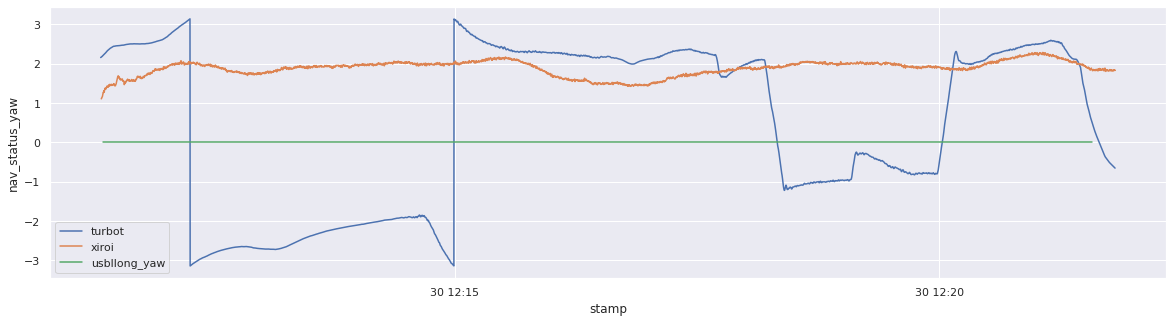

In [5]:
# Plot yaw
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=turbot_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=xiroi_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=USBLlon.dropna(),x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong_yaw"])
plt.show()
# The dataset from the xiroi navigation is shorter than the rest
# There is an offset rotation between the xiroi mag and the usbl mag. Let me unify datasets

In [6]:
#Create a unified dataframe:
nav = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
nav=nav.join(USBLlon).dropna()
#nav=nav.join(modem_delayed).dropna()
nav=nav.join(modem_raw).dropna()
nav.head()
# nav=nav.join(xiroi_setpoints).dropna()
# nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,usbllong_pitch,usbllong_roll,usbllong_yaw,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
stamp,,,,,,,,,,,,,,,,,,,,,
2021-11-30 12:11:28.000,3.654812,10.056217,-27.222448,3.779794,39.543785,2.378842,0.037149,-0.075179,2.428945,0.0,...,0.0,0.0,0.0,-57.197751,17.704738,-3.0881,0.348479,-0.030567,-0.028056,0.936398
2021-11-30 12:11:29.000,3.577084,11.807799,-34.065836,3.820940,39.543785,2.378842,0.051750,-0.089303,2.441984,0.0,...,0.0,0.0,0.0,-57.294492,17.924051,-2.6364,0.341126,-0.039642,-0.033054,0.938599
2021-11-30 12:11:30.500,3.493528,13.411189,-39.772771,3.849226,39.543785,2.378842,0.126639,-0.080362,2.453901,0.0,...,0.0,0.0,0.0,-56.429253,17.115442,-2.0365,0.333782,-0.073084,-0.016747,0.939664
2021-11-30 12:11:34.400,3.344722,17.783073,-48.354768,4.205331,39.543785,2.378842,0.206979,-0.089663,2.470347,0.0,...,0.0,0.0,0.0,-61.205994,24.632082,-1.7306,0.322962,-0.112540,-0.008634,0.939657
2021-11-30 12:11:35.900,3.335419,19.109339,-50.925917,4.146410,39.543785,2.378842,0.168979,-0.121203,2.483461,0.0,...,0.0,0.0,0.0,-59.521924,22.523164,-1.9376,0.317005,-0.099319,-0.029196,0.942757


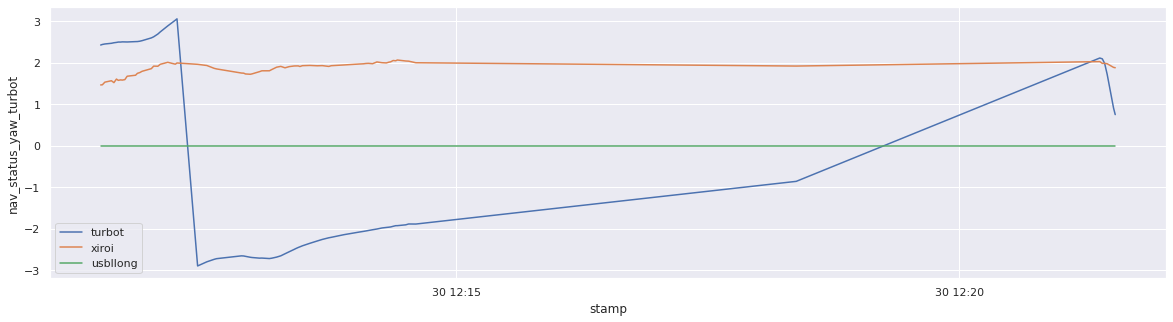

In [7]:
# Plot yaw again
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()

In [8]:
# Now get the mean yaw difference
yaw_diff = nav.nav_status_yaw_xiroi.mean() - nav.usbllong_yaw.mean()
print(yaw_diff*180/np.pi)

# We will assume that ther is a 90º rotation
nav['usbllong_yaw_corrected'] = nav['usbllong_yaw'] + yaw_diff

106.77019355946582


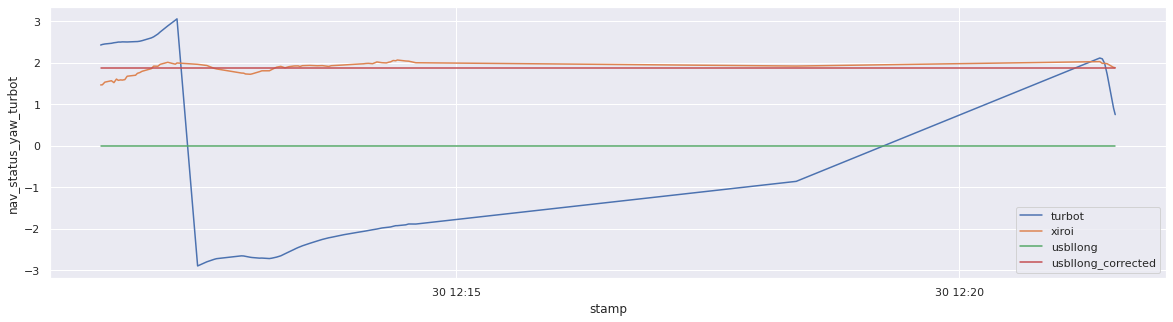

In [9]:
# Plot yaw again!!
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw_corrected",ax=ax)
plt.legend(["turbot","xiroi","usbllong", "usbllong_corrected"])
plt.show()
# The differences are due to the use of different calibrations

In [10]:
# Lets transform the USBL measurements, use the following transformation matrix for the rotations
# x' = xcos(yaw) - ysin(yaw)
# y' = xsin(yaw) + cos(yaw)

# 1 - Xiroi + usbllong (mag xiroi)
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])
nav['p1_N'] = nav['nav_status_N_xiroi'] + usbllong_X_transf
nav['p1_E'] = nav['nav_status_E_xiroi'] + usbllong_Y_transf

# 2 - Xiroi + usbllong (mag usbl) 
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["usbllong_yaw_corrected"])-nav['usbllong_Y']*np.sin(nav["usbllong_yaw_corrected"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["usbllong_yaw_corrected"])+nav['usbllong_Y']*np.cos(nav["usbllong_yaw_corrected"])
nav['p2_N'] = nav['nav_status_N_xiroi']+usbllong_X_transf
nav['p2_E'] = nav['nav_status_E_xiroi']+usbllong_Y_transf
# 3 -  Xiroi + usbllong (mag usbl) not corrected 
nav['p3_N'] = nav['nav_status_N_xiroi']+ nav['usbllong_N']
nav['p3_E'] = nav['nav_status_E_xiroi']+ nav['usbllong_E']


# 3 -  Xiroi + usbllong (mag usbl) not corrected 
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["usbllong_yaw"])-nav['usbllong_Y']*np.sin(nav["usbllong_yaw"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["usbllong_yaw"])+nav['usbllong_Y']*np.cos(nav["usbllong_yaw"])
nav['p4_N'] = nav['nav_status_N_xiroi']+usbllong_X_transf
nav['p4_E'] = nav['nav_status_E_xiroi']+usbllong_Y_transf


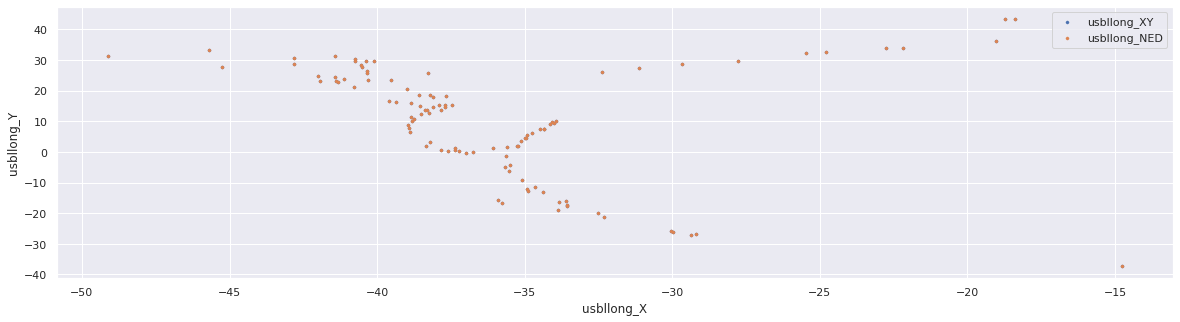

In [11]:
# Plot USBLlon XY and USBLlon NED(this one should be rotated in world directions according to USBL IMU) 
# Weird similarity?

fig, ax = plt.subplots()

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["usbllong_XY","usbllong_NED"])
#plt.axis('equal')
plt.show()

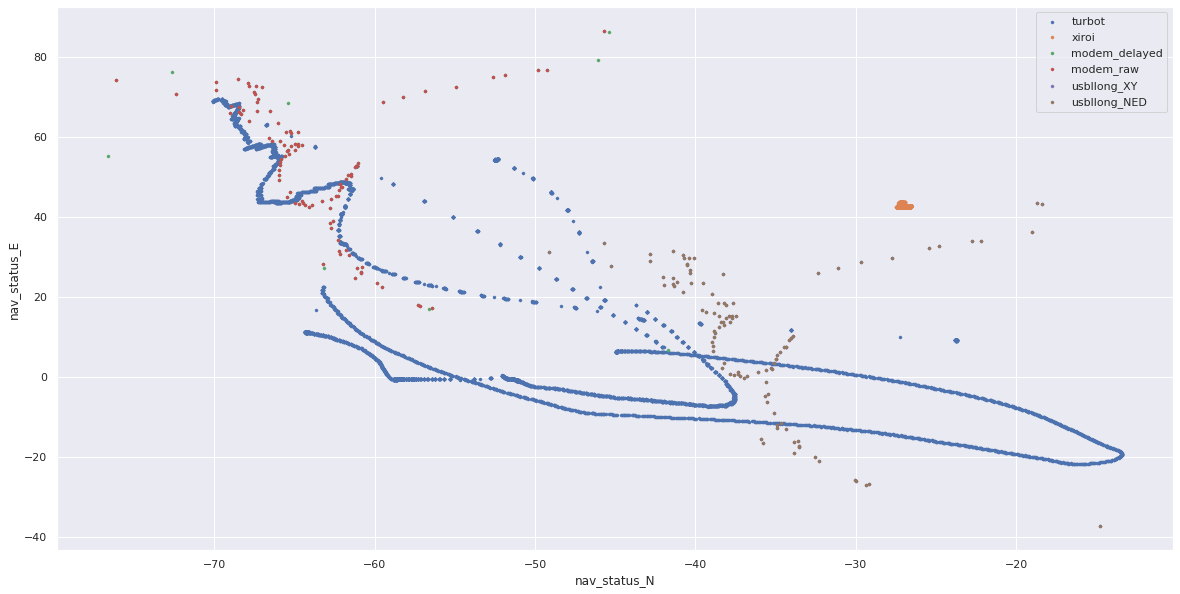

In [12]:
# Plot localization + USBllon +modem
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","xiroi","modem_delayed","modem_raw","usbllong_XY","usbllong_NED"])

# plt.axis('equal')
plt.show()

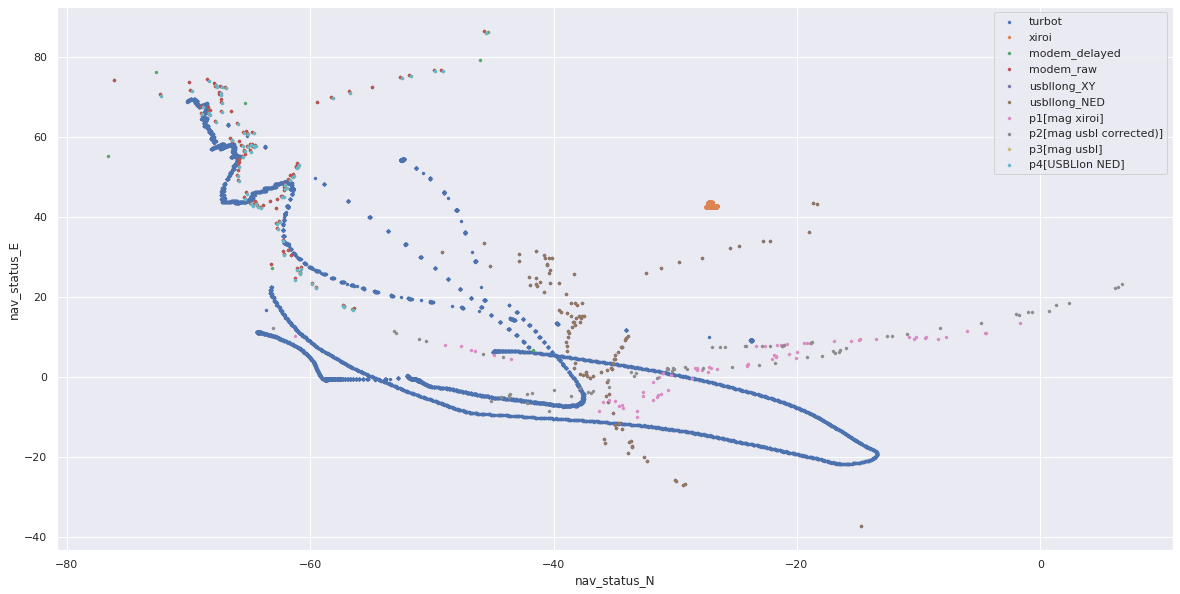

In [13]:
# Plot localization + USBllon +modem
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p3_N", y="p3_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p4_N", y="p4_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","modem_delayed","modem_raw","usbllong_XY","usbllong_NED", "p1[mag xiroi]","p2[mag usbl corrected)]","p3[mag usbl]","p4[USBLlon NED]"])

# plt.axis('equal')
plt.show()

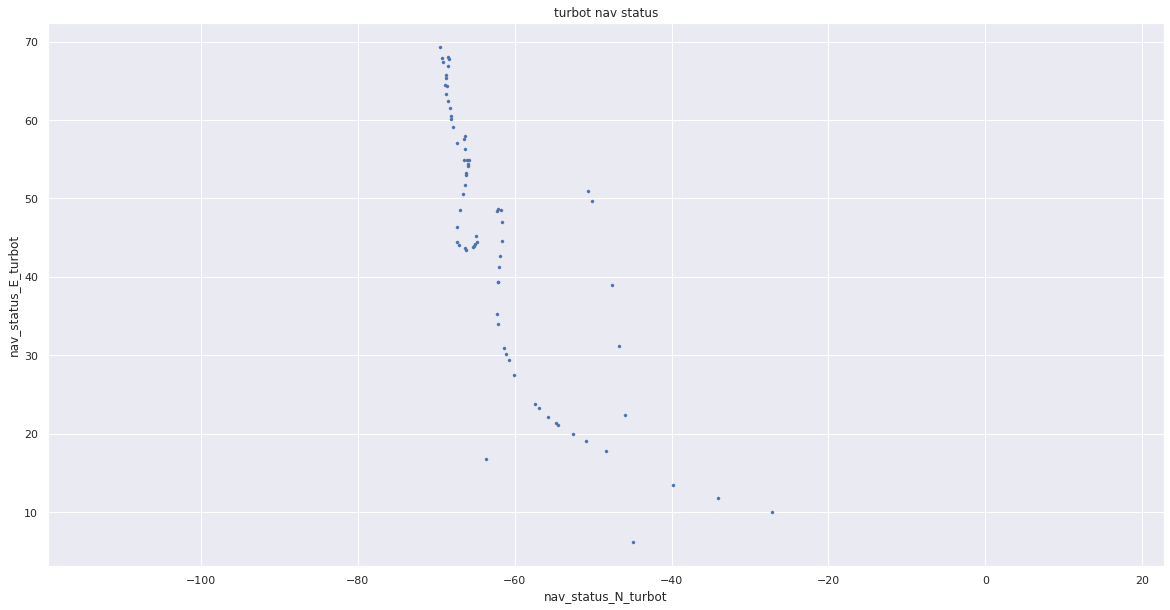

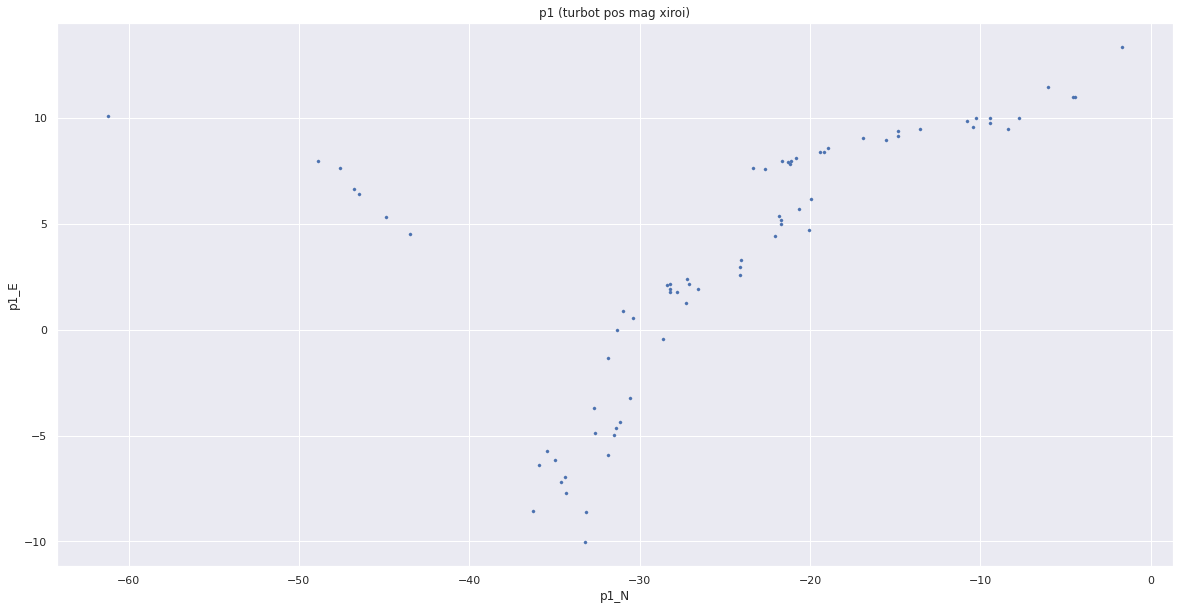

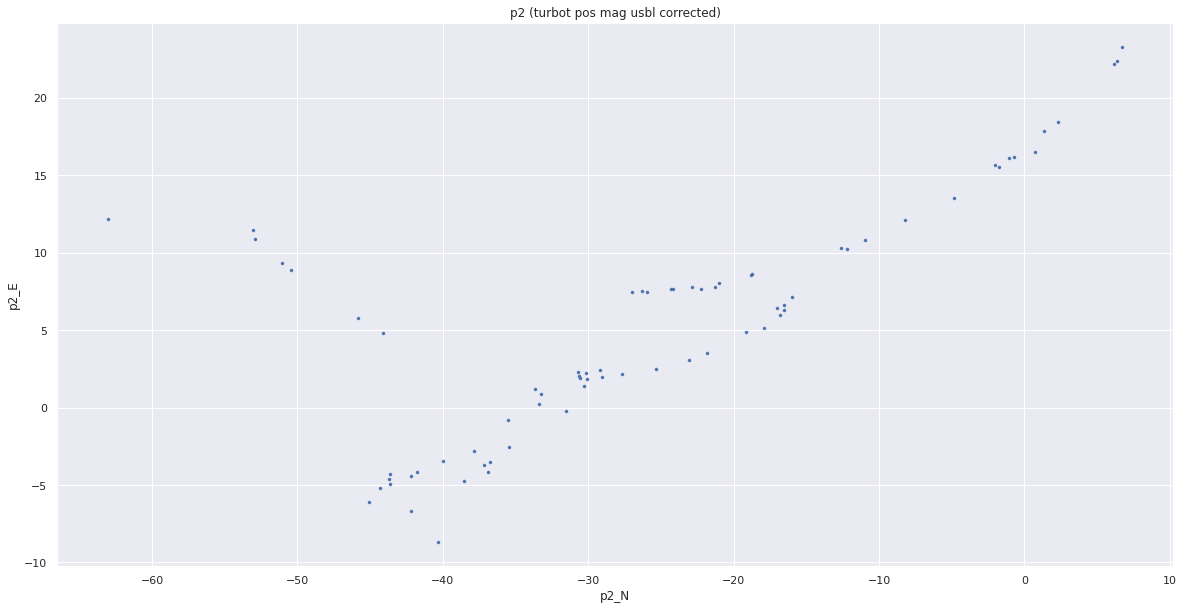

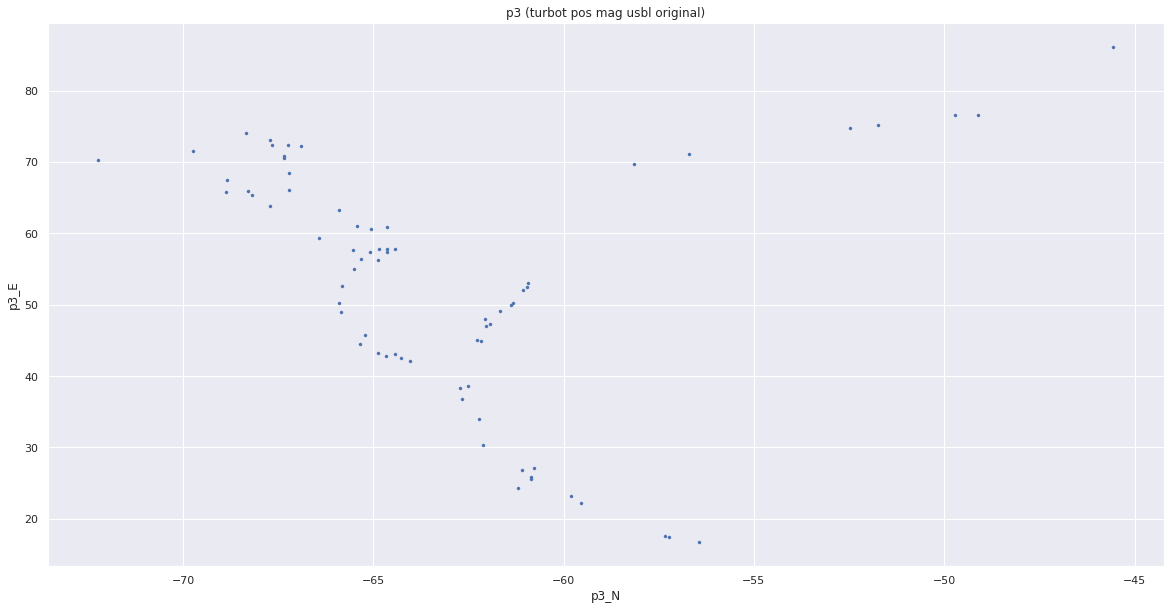

In [14]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.title("turbot nav status")    
plt.axis('equal')
plt.show()

sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.title("p1 (turbot pos mag xiroi)")
plt.show()


sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.title("p2 (turbot pos mag usbl corrected)")

# plt.axis('equal')
plt.show()

sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="p3_N", y="p3_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.title("p3 (turbot pos mag usbl original)")

# plt.axis('equal')
plt.show()

# plt.legend(["turbot","p1 (xiroi_mag) ","p2 (usbl mag corrected)","p3 (usbl mag original)"])




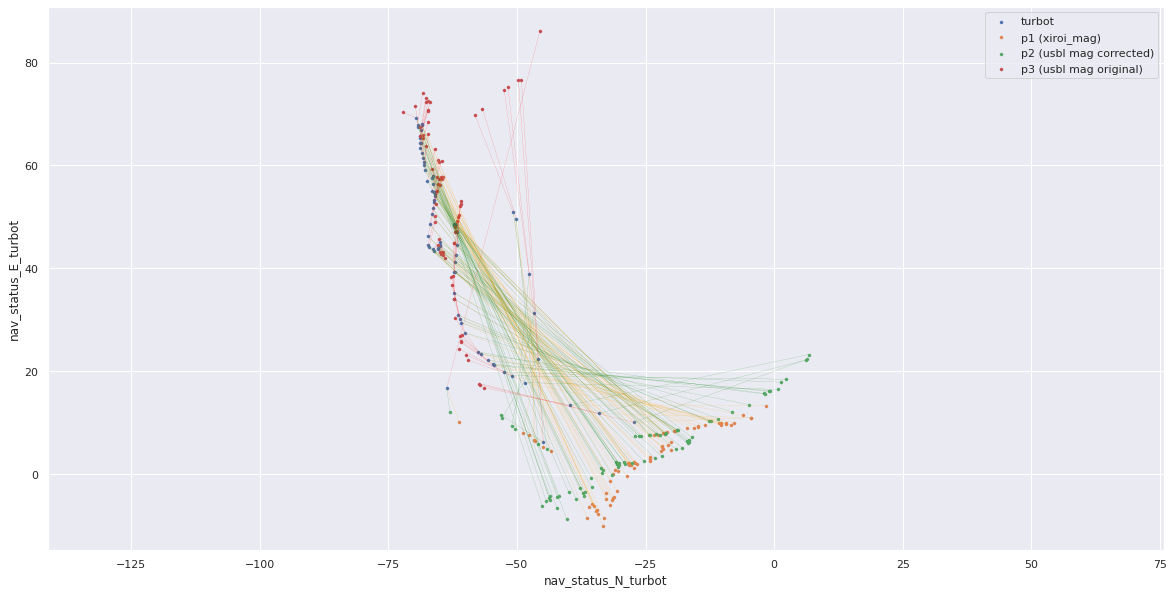

In [15]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p3_N", y="p3_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","p1 (xiroi_mag) ","p2 (usbl mag corrected)","p3 (usbl mag original)"])

for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
    
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p3_N], [row.nav_status_E_turbot, row.p3_E], linewidth=0.1, c='red')
    
plt.axis('equal')
plt.show()

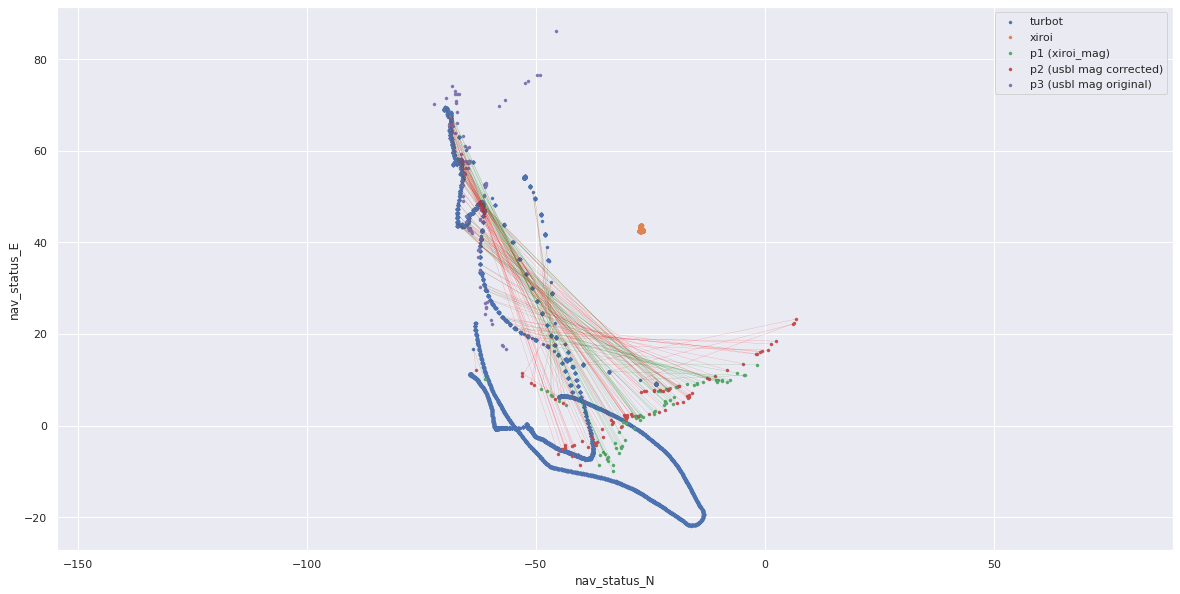

In [16]:
# Plot localization + USBllon +modem
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p3_N", y="p3_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","xiroi", "p1 (xiroi_mag) ","p2 (usbl mag corrected)","p3 (usbl mag original)"])
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='green')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='red')
plt.axis('equal')
plt.show()

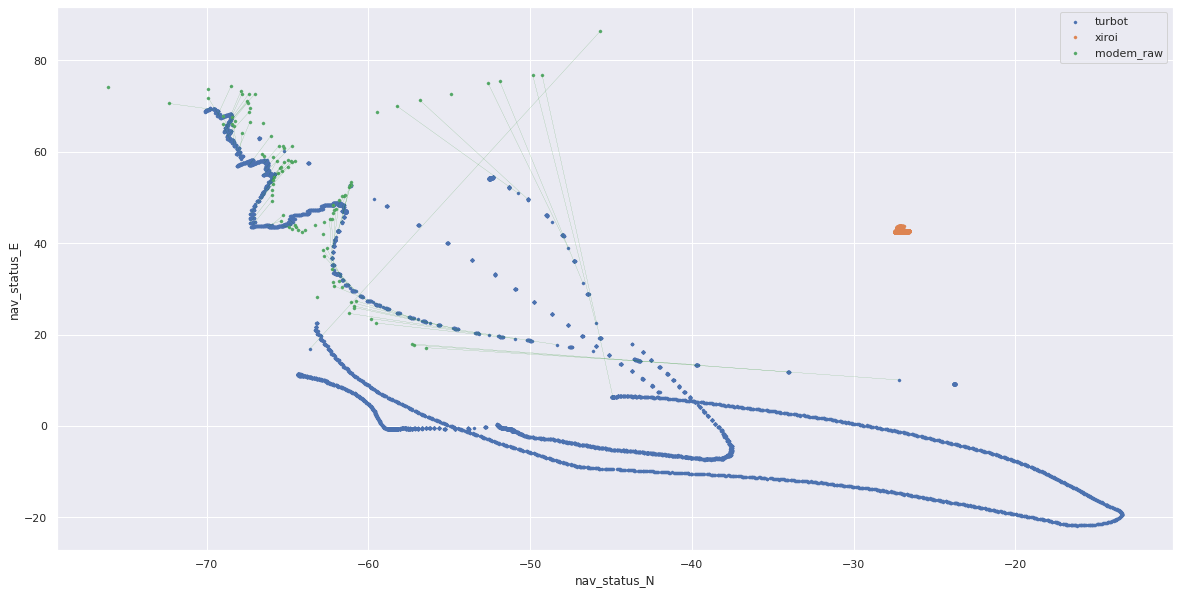

In [17]:
#Create a unified dataframe:
nav2 = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
# display(nav2.head())
nav2=nav2.join(USBLlon).dropna()
# display(nav2.head())
nav2=nav2.join(modem_delayed).dropna()
# display(nav2.head())
nav2=nav2.join(modem_raw).dropna()
# display(nav2.head())

# Plot localization + USBllon +modem
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","xiroi","modem_raw"])

for index, row in nav2.iterrows():
    plt.plot([row.nav_status_N_turbot, row.modem_raw_X], [row.nav_status_E_turbot, row.modem_raw_Y], linewidth=0.1, c='green')

# sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)


# plt.axis('equal')
plt.show()

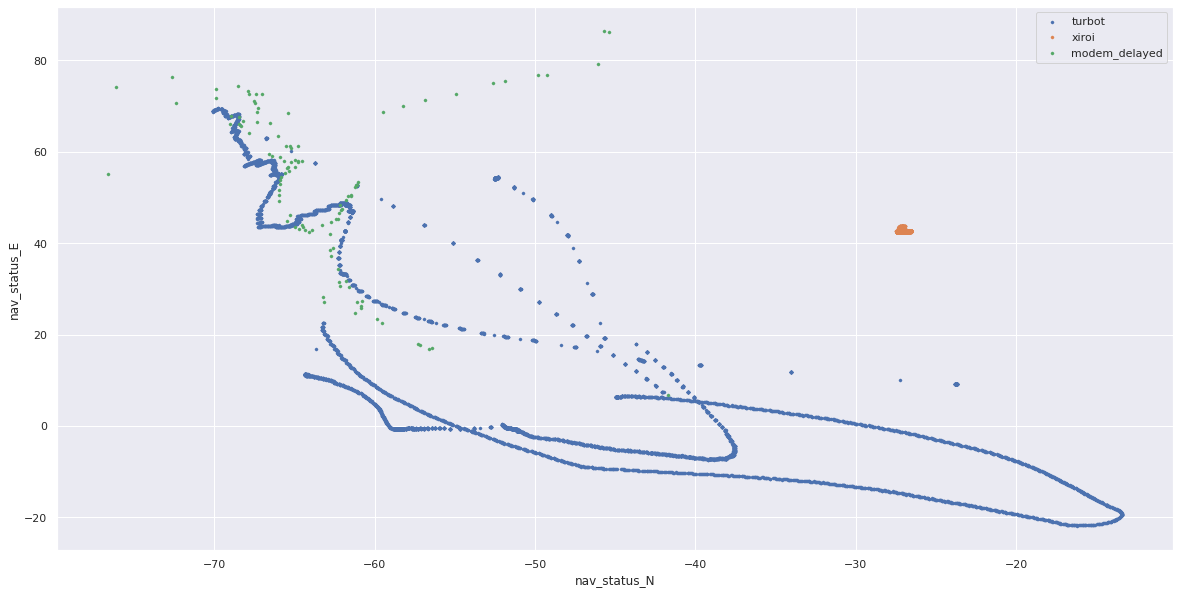

In [18]:
#Create a unified dataframe:
nav2 = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
# display(nav2.head())
nav2=nav2.join(USBLlon).dropna()
# display(nav2.head())
nav2=nav2.join(modem_delayed).dropna()
# display(nav2.head())
nav2=nav2.join(modem_raw).dropna()
# display(nav2.head())

# Plot localization + USBllon +modem
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","xiroi","modem_delayed"])
# sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# plt.legend(["turbot","xiroi","modem_delayed","modem_raw","usbllong_XY","usbllong_NED"])

# plt.axis('equal')
plt.show()

In [19]:
nav2.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
stamp,,,,,,,,,,,,,,,,,,,,,
2021-11-30 12:11:28.000,3.654812,10.056217,-27.222448,3.779794,39.543785,2.378842,0.037149,-0.075179,2.428945,0.0,...,0.0,0.0,0.0,-57.197751,17.704738,-3.0881,0.348479,-0.030567,-0.028056,0.936398
2021-11-30 12:11:29.000,3.577084,11.807799,-34.065836,3.820940,39.543785,2.378842,0.051750,-0.089303,2.441984,0.0,...,0.0,0.0,0.0,-57.294492,17.924051,-2.6364,0.341126,-0.039642,-0.033054,0.938599
2021-11-30 12:11:30.500,3.493528,13.411189,-39.772771,3.849226,39.543785,2.378842,0.126639,-0.080362,2.453901,0.0,...,0.0,0.0,0.0,-56.429253,17.115442,-2.0365,0.333782,-0.073084,-0.016747,0.939664
2021-11-30 12:11:34.400,3.344722,17.783073,-48.354768,4.205331,39.543785,2.378842,0.206979,-0.089663,2.470347,0.0,...,0.0,0.0,0.0,-61.205994,24.632082,-1.7306,0.322962,-0.112540,-0.008634,0.939657
2021-11-30 12:11:35.900,3.335419,19.109339,-50.925917,4.146410,39.543785,2.378842,0.168979,-0.121203,2.483461,0.0,...,0.0,0.0,0.0,-59.521924,22.523164,-1.9376,0.317005,-0.099319,-0.029196,0.942757


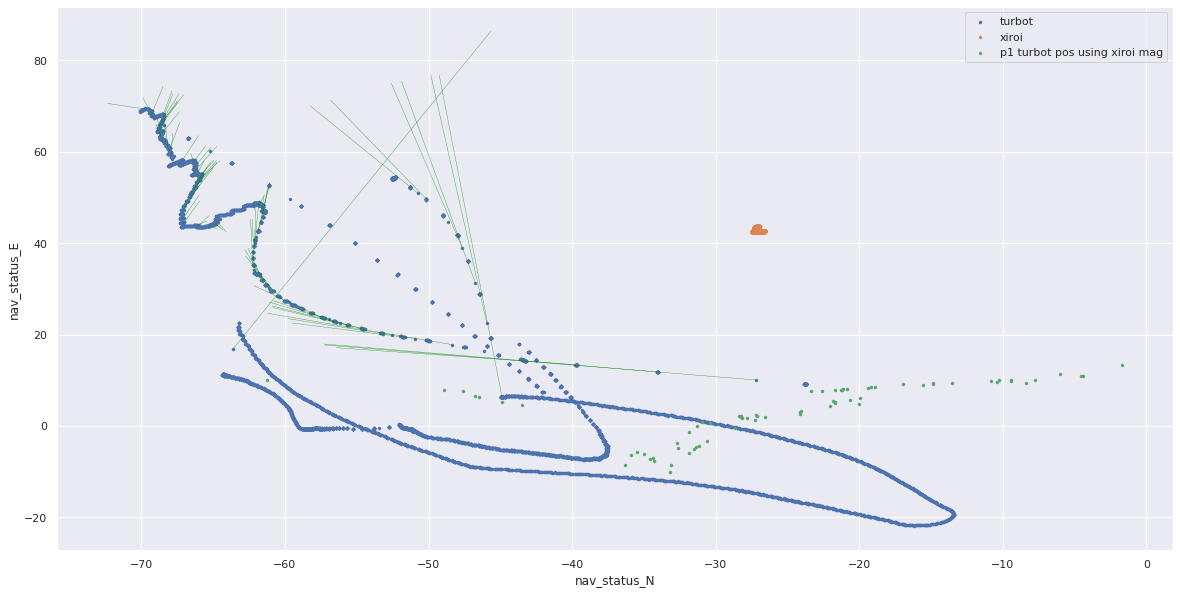

In [20]:
# Plot localization + USBllon +modem
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()

sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav2,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav2,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav2,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","xiroi","p1 turbot pos using xiroi mag"])
            #"modem_delayed","modem_raw","usbllong_XY","usbllong_NED"])

# plt.axis('equal')

for index, row in nav2.iterrows():
    plt.plot([row.nav_status_N_turbot, row.modem_delayed_X], [row.nav_status_E_turbot, row.modem_delayed_Y], linewidth=0.3, c='green')
plt.show()

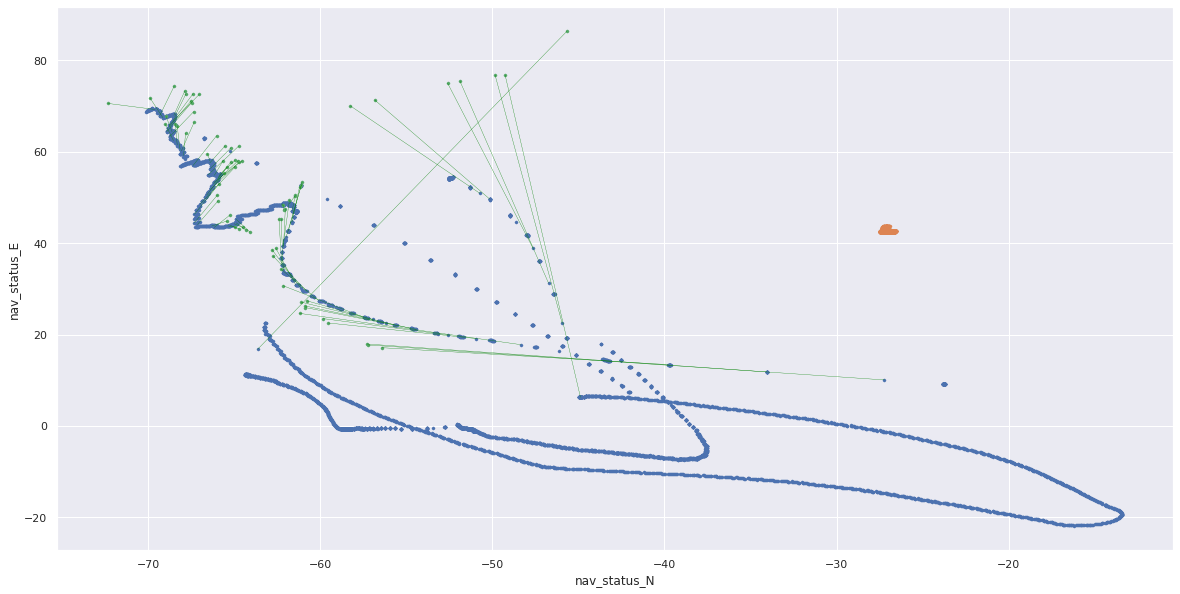

In [21]:
# Plot localization + USBllon +modem
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()

sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav2,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav2,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav2,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# plt.legend(["turbot","xiroi","modem_delayed","modem_raw","usbllong_XY","usbllong_NED"])

# plt.axis('equal')

for index, row in nav2.iterrows():
    plt.plot([row.nav_status_N_turbot, row.modem_delayed_X], [row.nav_status_E_turbot, row.modem_delayed_Y], linewidth=0.3, c='green')
plt.show()

In [22]:
# Compute error
N_error_p1 = np.abs(nav['nav_status_N_turbot']-nav['p1_N'])
E_error_p1 = np.abs(nav['nav_status_E_turbot']-nav['p1_E'])
nav['error_p1'] = np.sqrt(np.power(N_error_p1,2)+np.power(E_error_p1,2))

N_error_p2 = np.abs(nav['nav_status_N_turbot']-nav['p2_N'])
E_error_p2 = np.abs(nav['nav_status_E_turbot']-nav['p2_E'])
nav['error_p2'] = np.sqrt(np.power(N_error_p2,2)+np.power(E_error_p2,2))

N_error_p3 = np.abs(nav['nav_status_N_turbot']-nav['p3_N'])
E_error_p3 = np.abs(nav['nav_status_E_turbot']-nav['p3_E'])
nav['error_p3'] = np.sqrt(np.power(N_error_p3,2)+np.power(E_error_p3,2))

In [23]:
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,p1_E,p2_N,p2_E,p3_N,p3_E,p4_N,p4_E,error_p1,error_p2,error_p3
stamp,,,,,,,,,,,,,,,,,,,,,
2021-11-30 12:11:28.000,3.654812,10.056217,-27.222448,3.779794,39.543785,2.378842,0.037149,-0.075179,2.428945,0.0,...,10.959935,6.388606,22.338169,-57.226915,17.385304,-57.226915,17.385304,22.811193,35.784764,30.886624
2021-11-30 12:11:29.000,3.577084,11.807799,-34.065836,3.820940,39.543785,2.378842,0.051750,-0.089303,2.441984,0.0,...,10.968091,6.168898,22.173204,-57.329329,17.607779,-57.329329,17.607779,29.505854,41.548471,23.975610
2021-11-30 12:11:30.500,3.493528,13.411189,-39.772771,3.849226,39.543785,2.378842,0.126639,-0.080362,2.453901,0.0,...,13.321790,6.722687,23.245209,-56.443625,16.798551,-56.443625,16.798551,38.095551,47.524053,17.011514
2021-11-30 12:11:34.400,3.344722,17.783073,-48.354768,4.205331,39.543785,2.378842,0.206979,-0.089663,2.470347,0.0,...,9.461955,0.694753,16.469417,-61.203667,24.315229,-61.203667,24.315229,40.833333,49.067109,14.413996
2021-11-30 12:11:35.900,3.335419,19.109339,-50.925917,4.146410,39.543785,2.378842,0.168979,-0.121203,2.483461,0.0,...,9.983641,2.317845,18.446317,-59.553516,22.195419,-59.553516,22.195419,44.157124,53.247890,9.162934


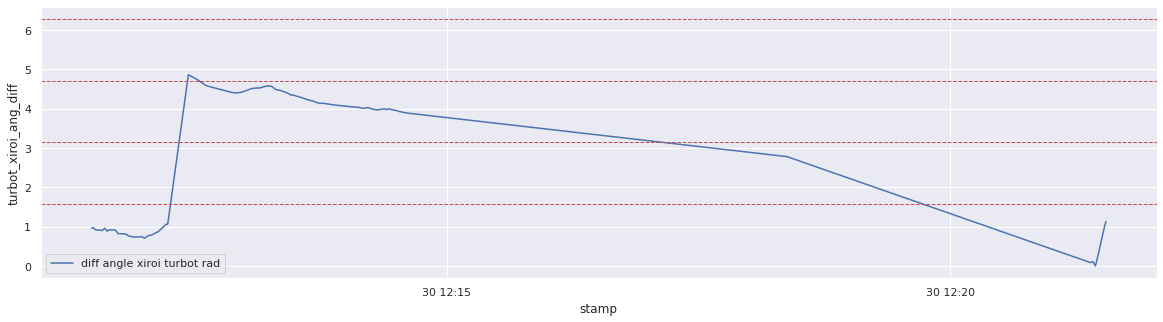

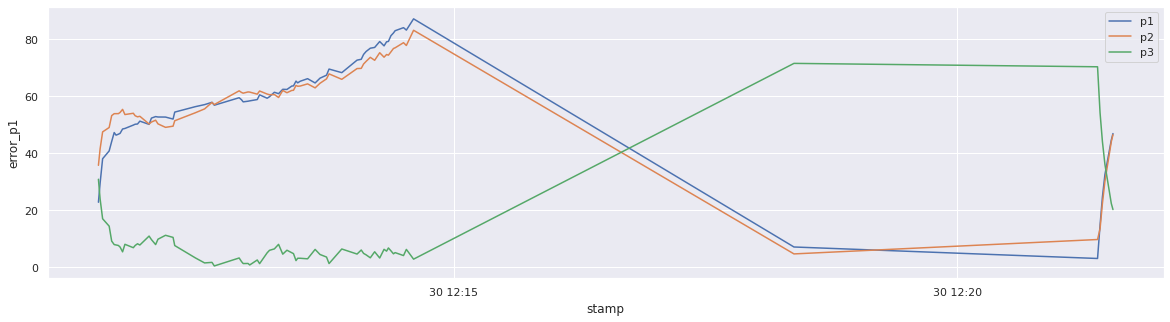

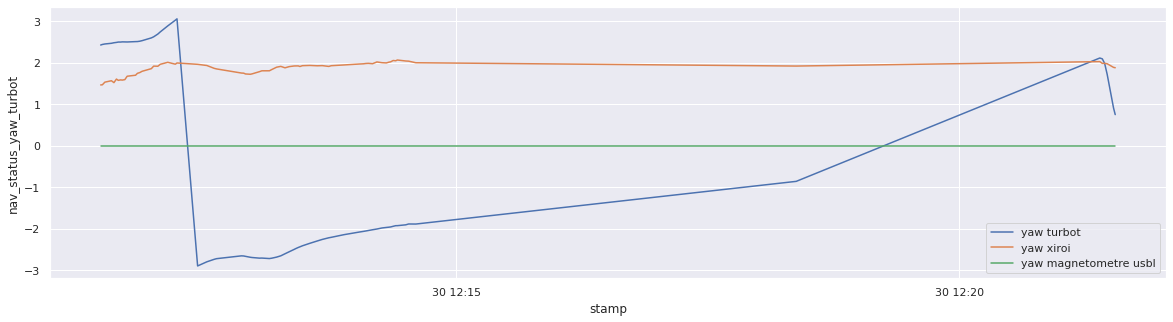

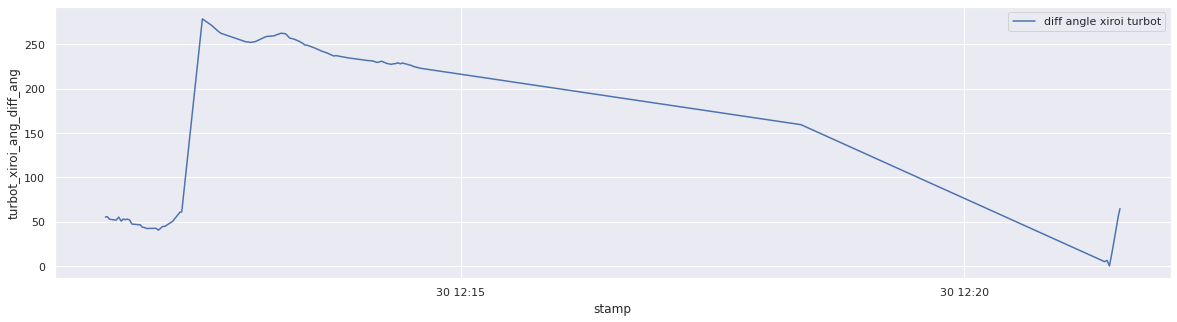

In [24]:
# Plot angle diff
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
nav['turbot_xiroi_ang_diff'] = np.abs(nav['nav_status_yaw_turbot']-nav['nav_status_yaw_xiroi'])
sns.lineplot(data=nav,x="stamp", y="turbot_xiroi_ang_diff",ax=ax)
ax.axhline(np.pi/2,linewidth=1, color='r',ls='--')
ax.axhline(np.pi,linewidth=1, color='r',ls='--')
ax.axhline((3/2)*np.pi,linewidth=1, color='r',ls='--')
ax.axhline(2*np.pi,linewidth=1, color='r',ls='--')

plt.legend(["diff angle xiroi turbot rad"])
plt.show()

# Plot error 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="error_p1",ax=ax)
sns.lineplot(data=nav,x="stamp", y="error_p2",ax=ax)
sns.lineplot(data=nav,x="stamp", y="error_p3",ax=ax)
plt.legend(["p1","p2","p3"])
plt.show()

# Plot angle 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["yaw turbot","yaw xiroi","yaw magnetometre usbl"])
plt.show()

# Plot angle diff deg
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
nav['turbot_xiroi_ang_diff_ang'] = nav['turbot_xiroi_ang_diff']*(180/np.pi)
sns.lineplot(data=nav,x="stamp", y="turbot_xiroi_ang_diff_ang",ax=ax)
plt.legend(["diff angle xiroi turbot"])
plt.show()




In [25]:
# Compute acoustic distance 
E_dist = np.abs(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'])
N_dist = np.abs(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'])
D_dist = nav['nav_status_D_turbot']-nav['nav_status_D_xiroi']

nav['dist_2D']=np.sqrt(np.power(E_dist,2)+np.power(N_dist,2))
nav['dist_3D']=np.sqrt(np.power(nav['dist_2D'],2)+np.power(D_dist,2))

In [26]:
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,p3_E,p4_N,p4_E,error_p1,error_p2,error_p3,turbot_xiroi_ang_diff,turbot_xiroi_ang_diff_ang,dist_2D,dist_3D
stamp,,,,,,,,,,,,,,,,,,,,,
2021-11-30 12:11:28.000,3.654812,10.056217,-27.222448,3.779794,39.543785,2.378842,0.037149,-0.075179,2.428945,0.0,...,17.385304,-57.226915,17.385304,22.811193,35.784764,30.886624,0.963057,55.179097,33.440907,33.640034
2021-11-30 12:11:29.000,3.577084,11.807799,-34.065836,3.820940,39.543785,2.378842,0.051750,-0.089303,2.441984,0.0,...,17.607779,-57.329329,17.607779,29.505854,41.548471,23.975610,0.972432,55.716260,32.393962,32.590862
2021-11-30 12:11:30.500,3.493528,13.411189,-39.772771,3.849226,39.543785,2.378842,0.126639,-0.080362,2.453901,0.0,...,16.798551,-56.443625,16.798551,38.095551,47.524053,17.011514,0.920619,52.747594,32.579670,32.766441
2021-11-30 12:11:34.400,3.344722,17.783073,-48.354768,4.205331,39.543785,2.378842,0.206979,-0.089663,2.470347,0.0,...,24.315229,-61.203667,24.315229,40.833333,49.067109,14.413996,0.902894,51.732006,33.126177,33.294606
2021-11-30 12:11:35.900,3.335419,19.109339,-50.925917,4.146410,39.543785,2.378842,0.168979,-0.121203,2.483461,0.0,...,22.195419,-59.553516,22.195419,44.157124,53.247890,9.162934,0.961698,55.101257,33.872161,34.035986


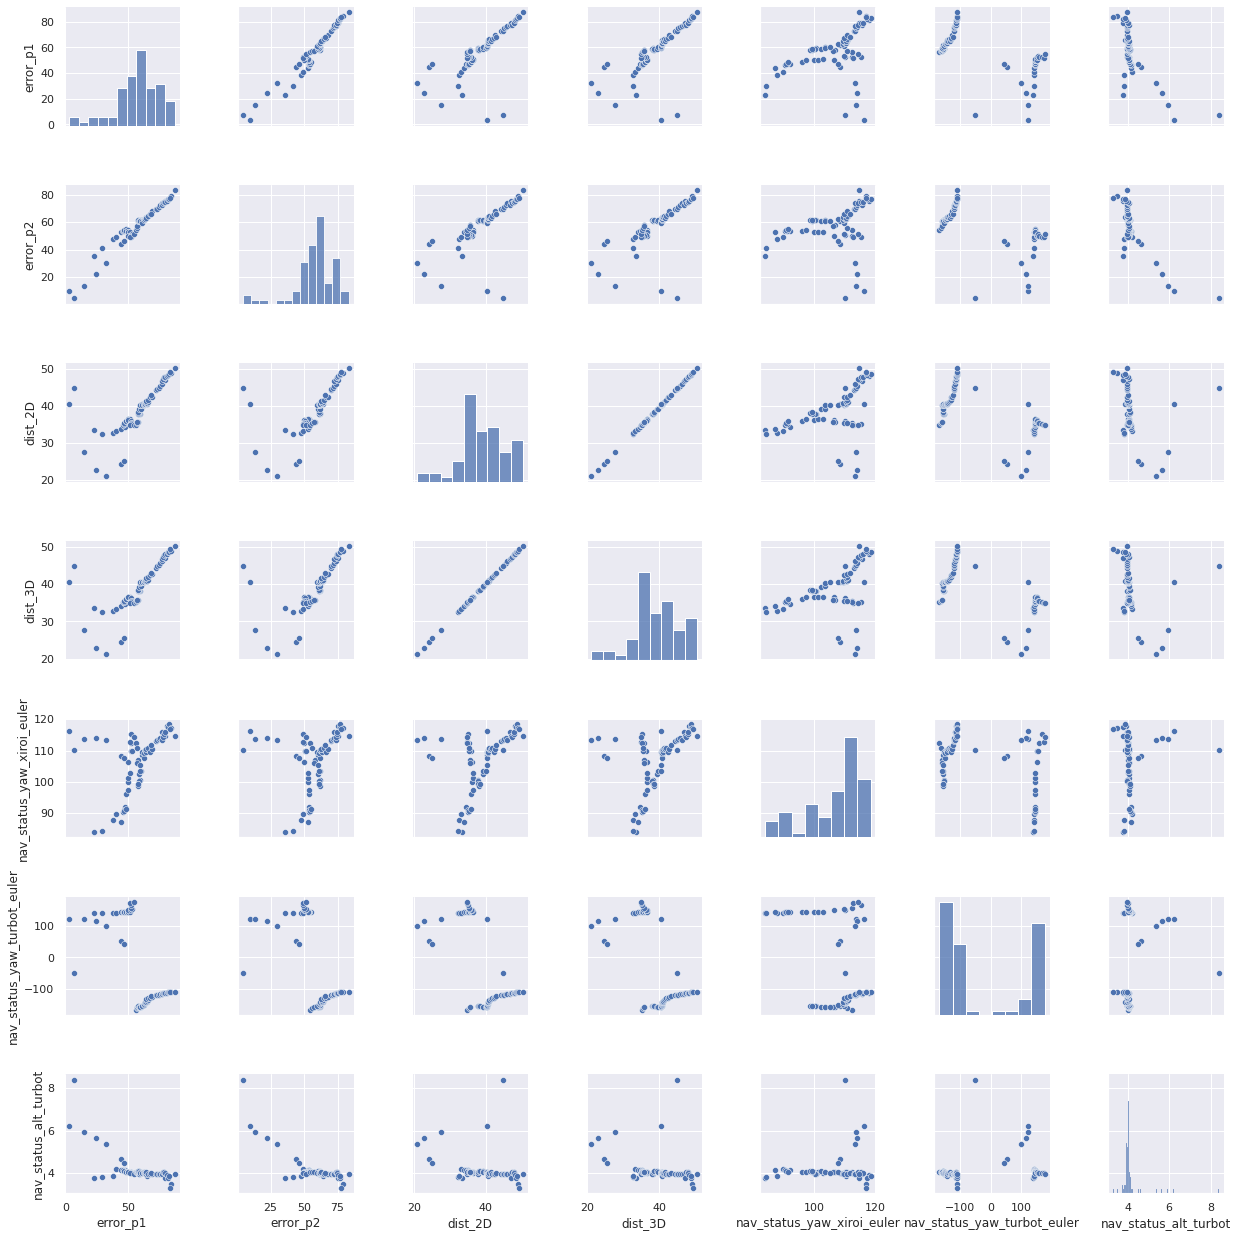

In [27]:
# Error correlation with distance and orientation
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
nav['nav_status_yaw_turbot_euler'] = nav['nav_status_yaw_turbot'] *180/np.pi 
nav_corr=nav[['error_p1','error_p2','dist_2D','dist_3D','nav_status_yaw_xiroi_euler','nav_status_yaw_turbot_euler','nav_status_alt_turbot']]
sns.pairplot(nav_corr)

,error_p1,error_p2,dist_3D,nav_status_yaw_xiroi
count,73.000000,73.000000,73.000000,73.000000
mean,57.575598,57.735571,39.073475,1.863491
std,17.419410,15.102867,6.219769,0.156515
min,3.056290,4.662544,21.187590,1.465888
25%,49.916034,52.814868,35.558303,1.764149
50%,58.820241,60.783396,39.354325,1.919783
75%,67.449328,65.993346,42.628927,1.977855
max,87.233322,83.219844,50.256659,2.067089


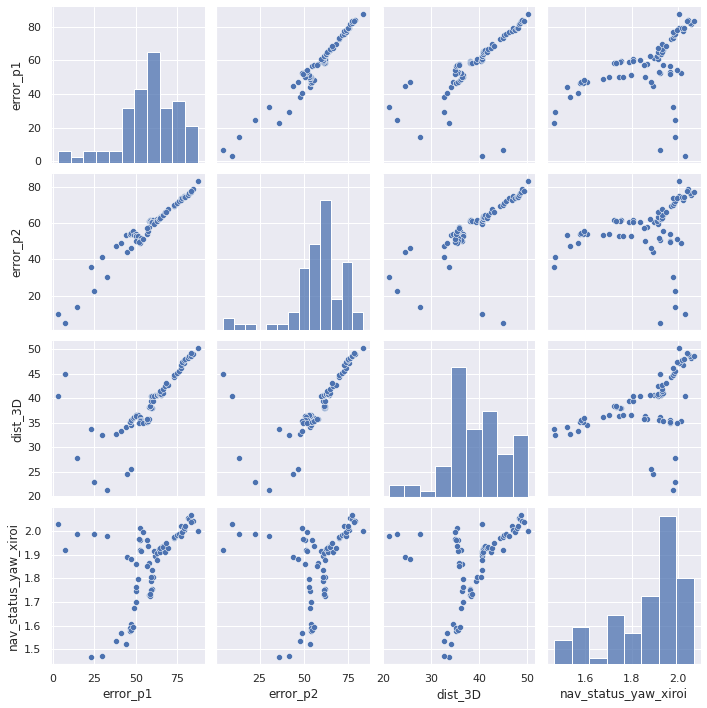

In [28]:
# Error correlation with distance and orientation
nav_corr=nav[['error_p1','error_p2','dist_3D','nav_status_yaw_xiroi']]
sns.pairplot(nav_corr)
# There is a clear correlation between the usbl error and the xiroi orientation, not that evident but important with the distance
display(nav_corr.describe())

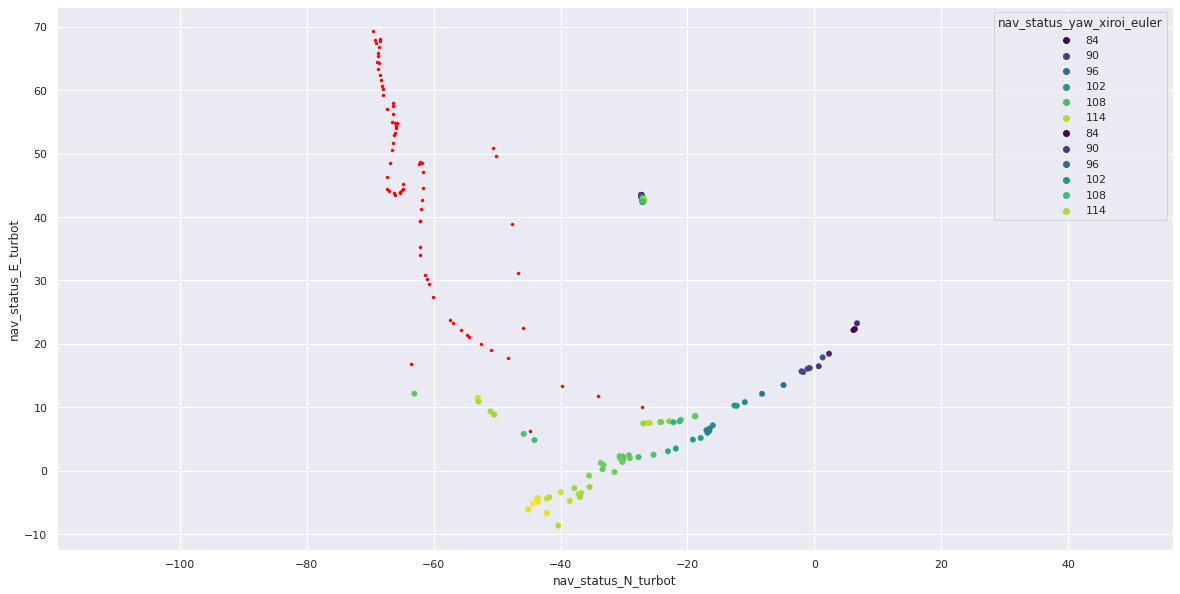

In [29]:
# Lets plot again the localization results, this time color represents the xiroi orientation
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

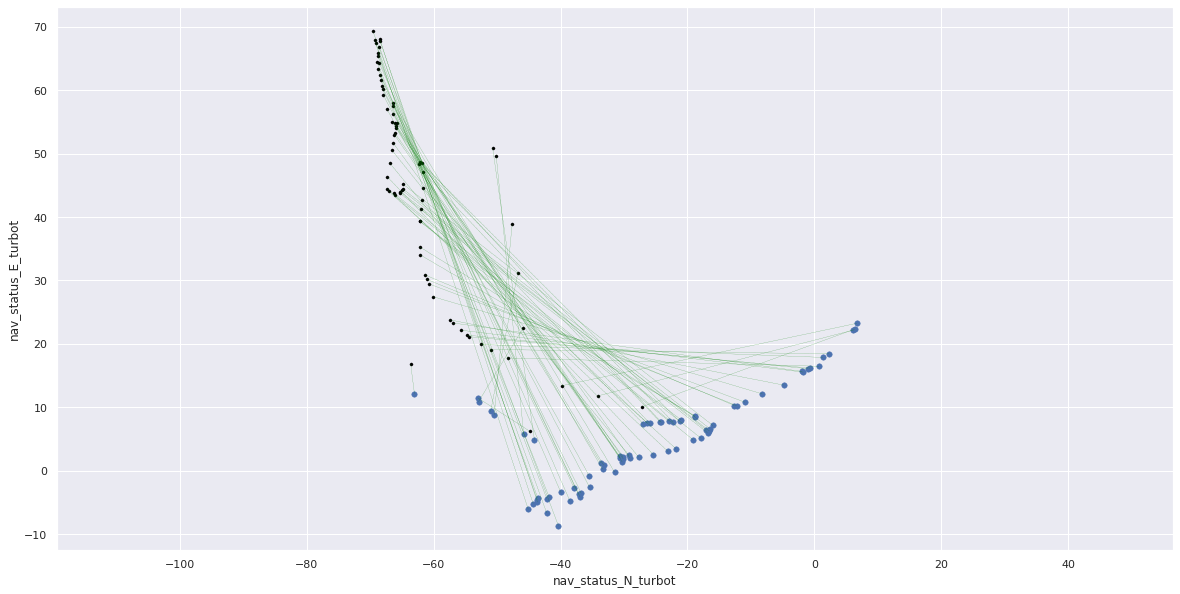

In [30]:

sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='black')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=30, ax=ax)
# sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')

for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.2,ls="--", c='green')


plt.axis('equal')

plt.show()

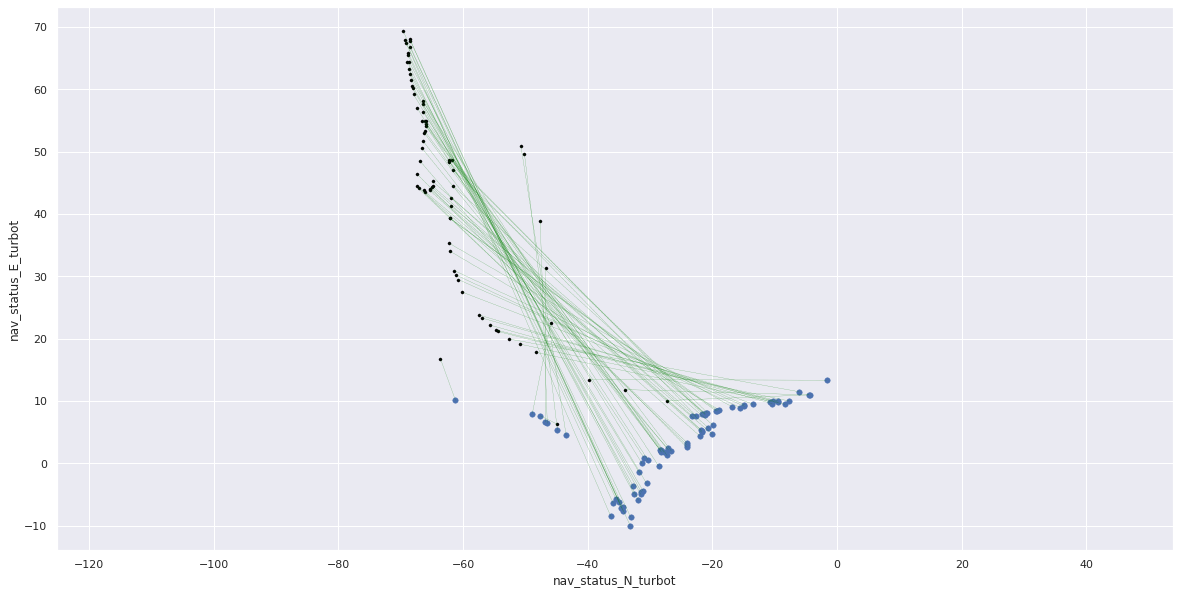

In [31]:

sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='black')
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=30, ax=ax)
# sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')

for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.2,ls="--", c='green')


plt.axis('equal')

plt.show()

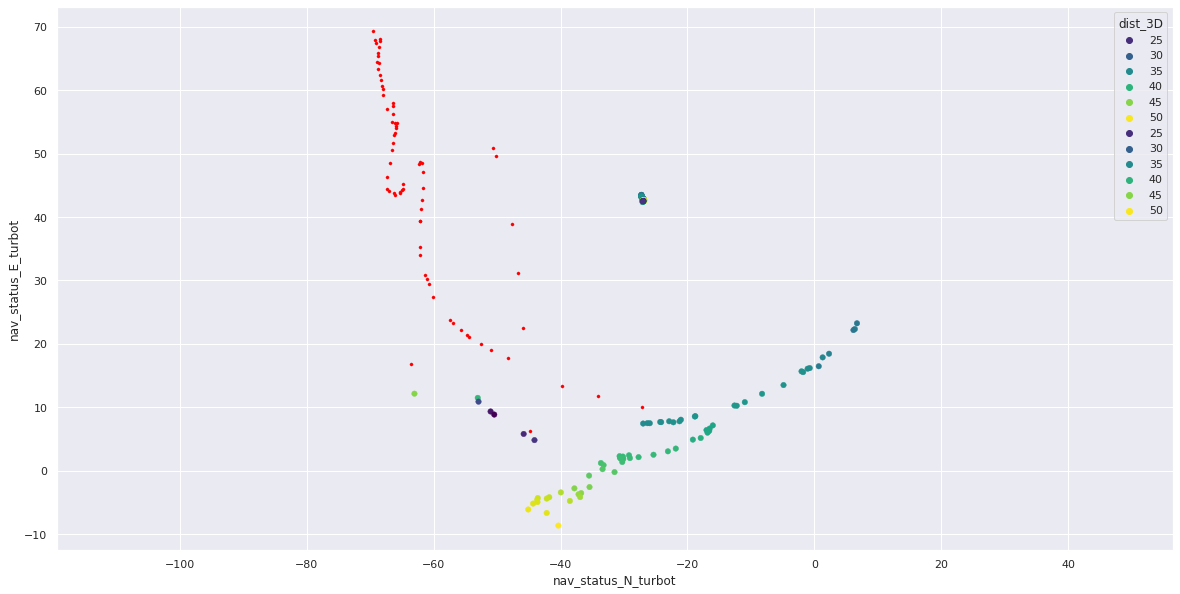

In [32]:
# Lets plot again the localization results, this time color represents the distance
sns.set(rc={'figure.figsize':(20,10)})
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

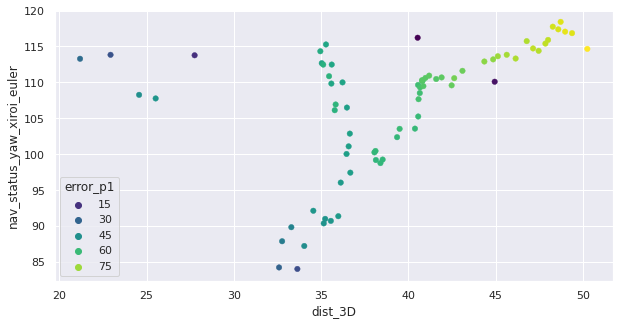

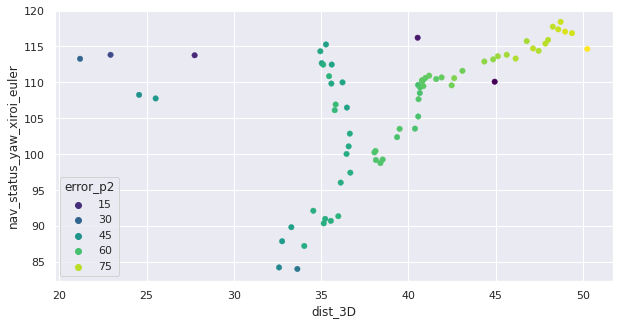

In [33]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p1', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p2', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()

In [34]:
# Check correlation with setpoints or speeds
# There is a clear correlation with the orientation. However it is not conclusive, we should check the correlation with setpoints or speeds. And check that in other datasets we find the same behavior.
# In case that we confirm this correlation find the cause
# Extract the RSSI values too